# Australian Geoscience Datacube
## Feature Summary Examples

The [Australian Geoscience Datacube](https://github.com/data-cube/agdc-v2) provides an integrated gridded data analysis environment for decades of analysis ready earth observation satellite and related data from multiple satellite and other acquisition systems.

For instructions on using the Datacube on NCI, see: http://agdc-v2.readthedocs.io/en/develop/nci_usage.html

For instructions on setting up your own instance, see: http://agdc-v2.readthedocs.io/en/develop/install.html

This notebook touches briefly on some the implimented features of the Datacube module, and is only intended to deomstrat functionality rather than be a tutorial.

In [1]:
%matplotlib inline
import datacube

If you have set up your config correctly, or are using the module on NCI, you should be able to make `Datacube` object that can connects to the configured datacube system.

In [2]:
dc = datacube.Datacube(app='dc-example')
dc

Datacube<index=Index<db=PostgresDb<engine=Engine(postgresql://lxl554@130.56.244.227:6432/datacube)>>>

## Datacube products and measurements
The Datacube provides pandas.DataFrame representations of the available products and measurements:

In [3]:
dc.list_products()

name  \
id                                 
1   ls5_satellite_telemetry_data   
2               ls5_level1_scene   
3                 ls5_nbar_scene   
4                ls5_nbart_scene   
13  ls8_satellite_telemetry_data   
6                ls5_nbar_albers   
24                 ls5_fc_albers   
8   ls7_satellite_telemetry_data   
9               ls7_level1_scene   
10                ls7_nbar_scene   
11               ls7_nbart_scene   
14              ls8_level1_scene   
15                ls8_nbar_scene   
5                   ls5_pq_scene   
16               ls8_nbart_scene   
19               ls8_nbar_albers   
21               ls7_nbar_albers   
17                  ls8_pq_scene   
20                 ls8_pq_albers   
23                 ls5_pq_albers   
12                  ls7_pq_scene   
22                 ls7_pq_albers   

                                          description   platform  \
id                                                                 
1                  Landsat 5 Satellite Telemetry Data  LANDSAT_5   
2       Landsat 5 Level 1 At-sensor Radiance 25 metre  LANDSAT_5   
3                             Landsat 5 NBAR 25 metre  LANDSAT_5   
4                            Landsat 5 NBART 25 metre  LANDSAT_5   
13                 Landsat 8 Satellite Telemetry Data  LANDSAT_8   
6   Landsat 5 Surface Reflectance NBAR 25 metre, 1...  LANDSAT_5   
24  Landsat 5 Fractional Cover 25 metre, 100km til...  LANDSAT_5   
8                  Landsat 7 Satellite Telemetry Data  LANDSAT_7   
9       Landsat 7 Level 1 At-sensor Radiance 25 metre  LANDSAT_7   
10                            Landsat 7 NBAR 25 metre  LANDSAT_7   
11                           Landsat 7 NBART 25 metre  LANDSAT_7   
14      Landsat 8 Level 1 At-sensor Radiance 25 metre  LANDSAT_8   
15                            Landsat 8 NBAR 25 metre  LANDSAT_8   
5                               Landsat 5 PQ 25 metre  LANDSAT_5   
16                           Landsat 8 NBART 25 metre  LANDSAT_8   
19  Landsat 8 Surface Reflectance NBAR 25 metre, 1...  LANDSAT_8   
21  Landsat 7 Surface Reflectance NBAR 25 metre, 1...  LANDSAT_7   
17                              Landsat 8 PQ 25 metre  LANDSAT_8   
20  Landsat 8 Pixel Quality 25 metre, 100km tile, ...  LANDSAT_8   
23  Landsat 5 Pixel Quality 25 metre, 100km tile, ...  LANDSAT_5   
12                              Landsat 7 PQ 25 metre  LANDSAT_7   
22  Landsat 7 Pixel Quality 25 metre, 100km tile, ...  LANDSAT_7   

                product_type instrument   format        crs resolution  \
id                                                                       
1   satellite_telemetry_data         TM      NaN        NaN        NaN   
2                     level1         TM  GeoTiff        NaN        NaN   
3                       nbar         TM  GeoTiff        NaN        NaN   
4                      nbart         TM  GeoTiff        NaN        NaN   
13  satellite_telemetry_data   OLI_TIRS      NaN        NaN        NaN   
6                       nbar         TM   NetCDF  EPSG:3577  [-25, 25]   
24          fractional_cover         TM   NetCDF  EPSG:3577  [-25, 25]   
8   satellite_telemetry_data        ETM      NaN        NaN        NaN   
9                     level1        ETM  GeoTiff        NaN        NaN   
10                      nbar        ETM  GeoTiff        NaN        NaN   
11                     nbart        ETM  GeoTiff        NaN        NaN   
14                    level1   OLI_TIRS  GeoTiff        NaN        NaN   
15                      nbar   OLI_TIRS  GeoTiff        NaN        NaN   
5                        pqa         TM  GeoTiff        NaN        NaN   
16                     nbart   OLI_TIRS  GeoTiff        NaN        NaN   
19                      nbar   OLI_TIRS   NetCDF  EPSG:3577  [-25, 25]   
21                      nbar        ETM   NetCDF  EPSG:3577  [-25, 25]   
17                       pqa   OLI_TIRS  GeoTiff        NaN        NaN   
20                       pqa   OLI_TIRS   NetCDF  

## Datacube Measurements
The list of measurements stored in the datacube can also be listed.

Measurements are also known as _bands_ in the imagery domain, and _data variables_ when stored in NetCDF files or when working with `xarray.Dataset` objects.

In [4]:
dc.list_measurements()

aliases  dtype  \
product         measurement                                         
ls5_nbar_scene  1                           [band_1, blue]  int16   
                2                          [band_2, green]  int16   
                3                            [band_3, red]  int16   
                4                            [band_4, nir]  int16   
                5                          [band_5, swir1]  int16   
                7                          [band_7, swir2]  int16   
ls5_nbart_scene 1                           [band_1, blue]  int16   
                2                          [band_2, green]  int16   
                3                            [band_3, red]  int16   
                4                            [band_4, nir]  int16   
                5                          [band_5, swir1]  int16   
                7                          [band_7, swir2]  int16   
ls5_nbar_albers blue                        [band_1, blue]  int16   
                green                      [band_2, green]  int16   
                red                          [band_3, red]  int16   
                nir                          [band_4, nir]  int16   
                swir1                      [band_5, swir1]  int16   
                swir2                      [band_7, swir2]  int16   
ls5_fc_albers   PV                             [green_veg]  uint8   
                NPV                             [dead_veg]  uint8   
                BS                                  [bare]  uint8   
                UE                                   [err]  uint8   
ls7_nbar_scene  1                           [band_1, blue]  int16   
                2                          [band_2, green]  int16   
                3                            [band_3, red]  int16   
                4                            [band_4, nir]  int16   
                5                          [band_5, swir1]  int16   
                7                          [band_7, swir2]  int16   
ls7_nbart_scene 1                           [band_1, blue]  int16   
                2                          [band_2, green]  int16   
...                                                    ...    ...   
ls8_nbar_scene  4                            [band_4, red]  int16   
                5                            [band_5, nir]  int16   
                6                          [band_6, swir1]  int16   
                7                          [band_7, swir2]  int16   
ls5_pq_scene    pqa                    [qa_flags, quality]  int16   
ls8_nbart_scene 1                [band_1, coastal_aerosol]  int16   
                2                           [band_2, blue]  int16   
                3                          [band_3, green]  int16   
                4                            [band_4, red]  int16   
                5                            [band_5, nir]  int16   
                6                          [band_6, swir1]  int16   
                7                          [band_7, swir2]  int16   
ls8_nbar_albers coastal_aerosol  [band_1, coastal_aerosol]  int16   
                blue                        [band_2, blue]  int16   
                green                      [band_3, green]  int16   
                red                          [band_4, red]  int16   
                nir                          [band_5, nir]  int16   
                swir1                      [band_6, swir1]  int16   
                swir2                      [band_7, swir2]  int16   
ls7_nbar_albers blue                        [band_1, blue]  int16   
                green                      [band_2, green]  int16   
                red                          [band_3, red]  int16   
                nir                          [band_4, nir]  int16   
                swir1                      [band_5, swir1]  int16   
                swir2                      [band_7, swir2]  int16   
ls8_pq_scene    pqa                    [qa_flags,

## Define spatio-temporal range and bands of interest 

In [5]:
#### DEFINE SPATIOTEMPORAL RANGE AND BANDS OF INTEREST
#Define spatial range
lat_max = -13.25
lat_min = -13.85
lon_max = 130.9
lon_min = 130.1

#Define temporal range
start_of_epoch = '2011-01-01'
#need a variable here that defines a rolling 'latest observation'
end_of_epoch =  '2011-12-31'

#Define wavelengths/bands of interest, remove this kwarg to retrieve all bands
bands_of_interest = ['nir','red']

In [6]:
ls5_nbar = dc.load(product='ls5_nbar_albers', 
                   x=(lon_min, lon_max), y=(lat_max, lat_min), 
                   time = (start_of_epoch, end_of_epoch), 
                   measurements = bands_of_interest)

In [7]:
#help (dc.load)

The returned data is an `xarray.Dataset` object, which is a labelled n-dimensional array wrapping a `numpy` array.

We can investigate the data to see the variables (measurement bands) and dimensions that were returned:

In [8]:
#to view the attributes of the xarray.data
ls5_nbar

<xarray.Dataset>
Dimensions:  (time: 30, x: 3543, y: 2661)
Coordinates:
  * time     (time) datetime64[ns] 2011-02-02T01:06:58 ...
  * y        (y) float64 -1.401e+06 -1.401e+06 -1.401e+06 -1.401e+06 ...
  * x        (x) float64 -2.09e+05 -2.089e+05 -2.089e+05 -2.089e+05 ...
Data variables:
    nir      (time, y, x) int16 -999 -999 -999 -999 -999 -999 -999 -999 -999 ...
    red      (time, y, x) int16 -999 -999 -999 -999 -999 -999 -999 -999 -999 ...
Attributes:
    crs: EPSG:3577

We can look at the data by name directly, or through the `data_vars` dictionary:

In [9]:
def calculate_size(bytes, gb=False):
    size = bytes / 1024.0 / 1024.0
    if gb: 
        return size / 1024.0
    return size
print "Array size in Gb:{}".format(calculate_size(ls5_nbar.nbytes, True))
VDIram = 12
RAMpercent = ((calculate_size(ls5_nbar.nbytes, True)/VDIram)*100)
print "Selected array is " +str(RAMpercent)+ " percent of available RAM"

Array size in Gb:1.05369894952
Selected array is 8.7808245793 percent of available RAM


In [10]:
#to view variables
ls5_nbar.data_vars

Data variables:
    nir      (time, y, x) int16 -999 -999 -999 -999 -999 -999 -999 -999 -999 ...
    red      (time, y, x) int16 -999 -999 -999 -999 -999 -999 -999 -999 -999 ...

In [11]:
#to view example of one variable
#ls5_nbar.red

## Group by time 
You may have noticed that some of the days above are repeated, with times less than a minute apart.  this is because of the overlap in LANDSAT scenes.  If we group by solar day (a rough local time based on longitude), we can combine these slices:

In [12]:
#Group by solar day to deal with north-south overlap duplicates
nbar_by_solar_day = dc.load(product='ls5_nbar_albers', 
                            x=(lon_min, lon_max), y=(lat_max, lat_min), 
                            time = (start_of_epoch, end_of_epoch),
                            measurements = bands_of_interest,
                            group_by='solar_day')
len(nbar_by_solar_day.time)
autumn2 = nbar_by_solar_day.nir.loc[start_of_epoch:end_of_epoch]
print autumn2.shape

(16, 2661, 3543)


## Plot the data without any masks
We can select the data at a particular time and see what is there. We can use pandas-style labels to select a time period, inclusive of the end label:

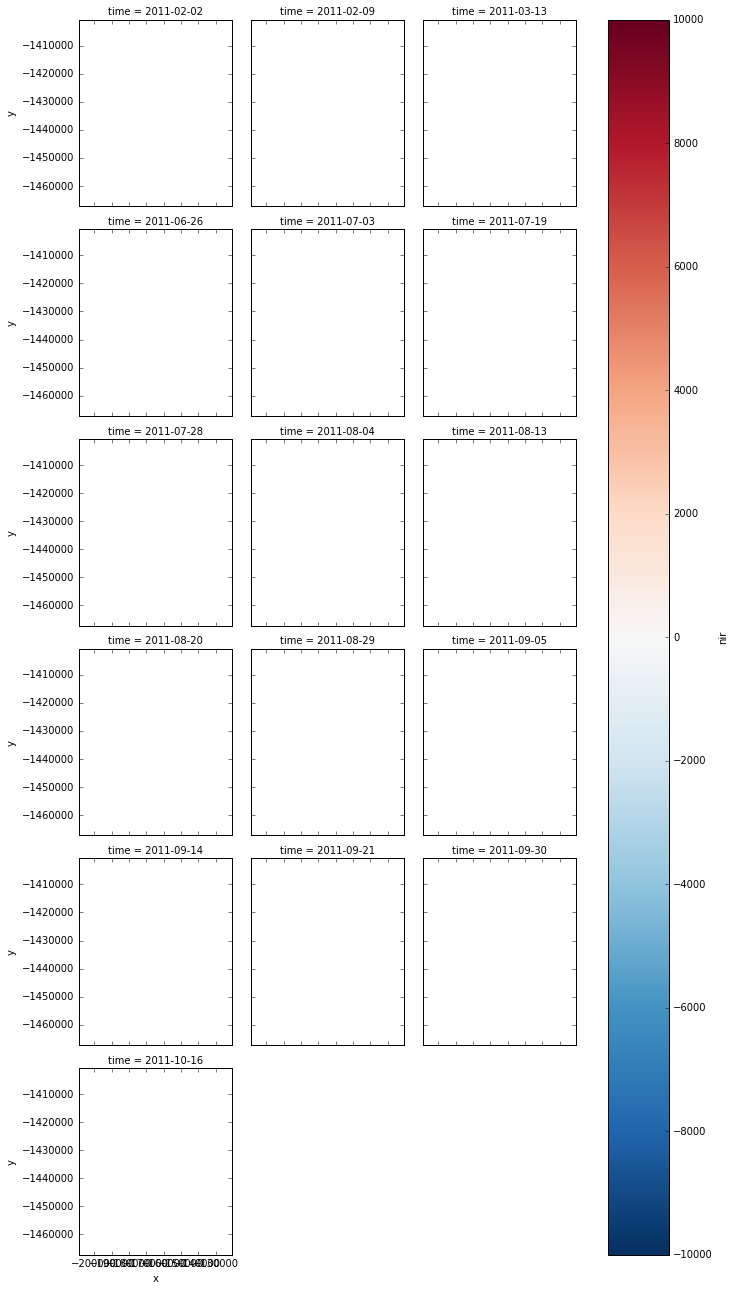

In [13]:
autumn2.plot(col='time', col_wrap=3)
#all_nir_data.plot(col='time', col_wrap=3)

## Masking out no_data and cloud affected pixels
When there is no data availaible, such as on the boundaries of a scene, it is filled in with a special value.
We can use filter it out, although xarray will convert the data from `int` to `float` so that it can use `NaN` to indicate no data.

Now that bad values are no longer represented as `-9999`, the data fits on a much better colour ramp:

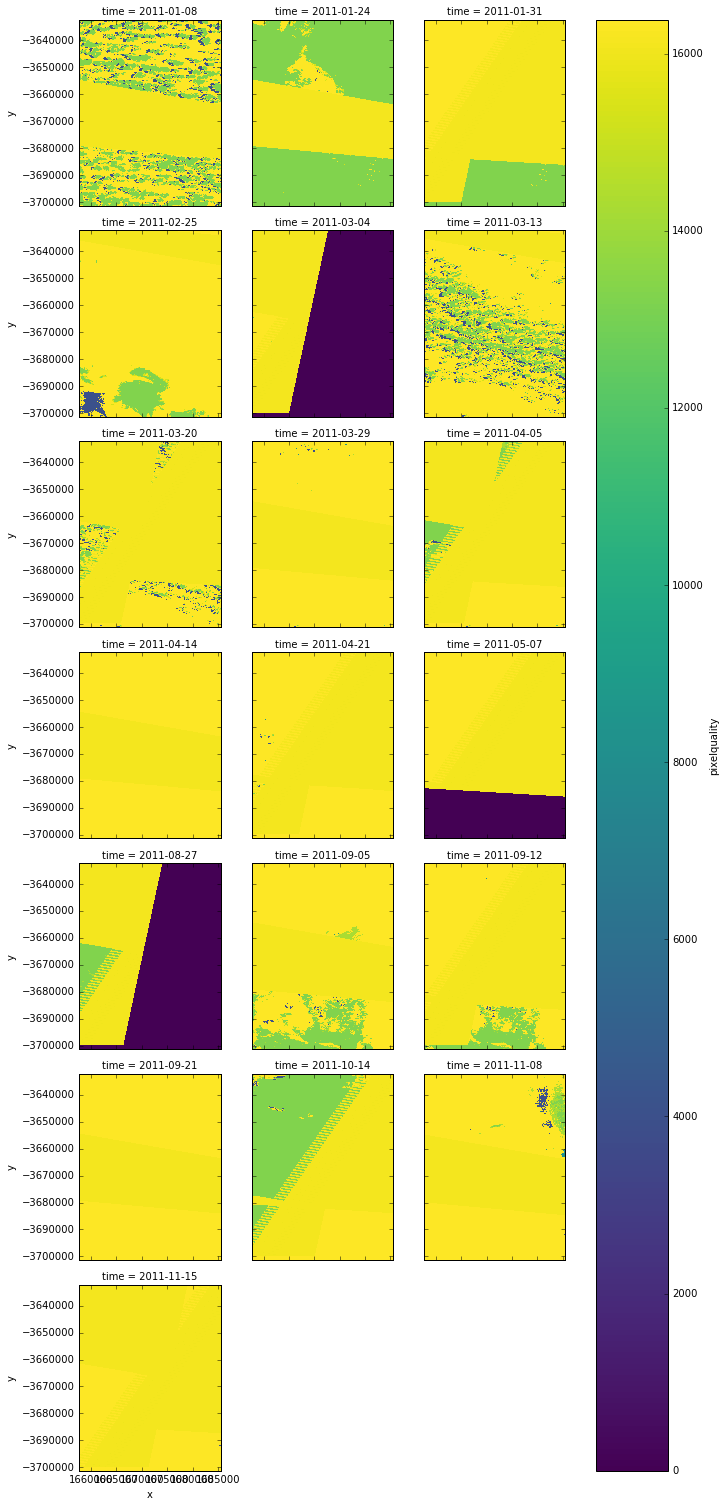

In [89]:
pq = dc.load(product='ls5_pq_albers',
             x=(lon_min, lon_max), y=(lat_max, lat_min), 
             time = (start_of_epoch, end_of_epoch),
             group_by='solar_day')
pq_autumn = pq.pixelquality.loc[start_of_epoch:end_of_epoch]
pq_autumn.plot(col='time', col_wrap=3)
#pq_autumn.shape

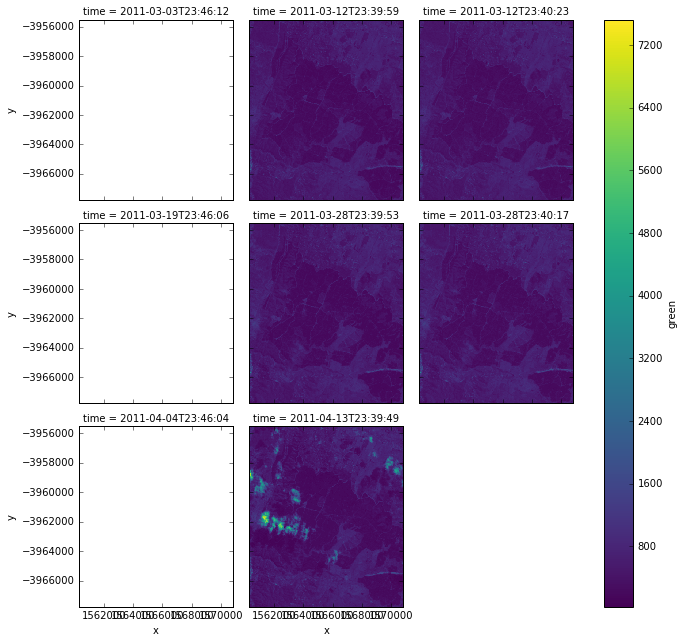

In [18]:
autumn_valid = autumn.where(autumn != autumn.attrs['nodata'])
autumn_valid.plot(col='time', col_wrap=3)


## Masking out cloud
Some of the images are clearly clouds, we should remove them.  There is a product with detected clouds called **PQ** (for Pixel Quality) we can use to mask out the clouds.

In [21]:
pq.time.max()


<xarray.DataArray 'time' ()>
numpy.datetime64('2011-11-14T23:43:42.000000000')

The PQ layer stores a bitmask of several values. We can list the information available:

In [22]:
from datacube.storage import masking
import pandas
pandas.DataFrame.from_dict(masking.get_flags_def(pq), orient='index')

values  \
blue_saturated                              {u'1': False, u'0': True}   
cloud_acca                        {u'1': u'no_cloud', u'0': u'cloud'}   
cloud_fmask                       {u'1': u'no_cloud', u'0': u'cloud'}   
cloud_shadow_acca   {u'1': u'no_cloud_shadow', u'0': u'cloud_shadow'}   
cloud_shadow_fmask  {u'1': u'no_cloud_shadow', u'0': u'cloud_shadow'}   
contiguous                                  {u'1': True, u'0': False}   
ga_good_pixel                                        {u'16383': True}   
green_saturated                             {u'1': False, u'0': True}   
land_sea                                {u'1': u'land', u'0': u'sea'}   
nir_saturated                               {u'1': False, u'0': True}   
red_saturated                               {u'1': False, u'0': True}   
swir1_saturated                             {u'1': False, u'0': True}   
swir2_saturated                             {u'1': False, u'0': True}   
tir_saturated                               {u'1': False, u'0': True}   

                                                              bits  \
blue_saturated                                                   0   
cloud_acca                                                      10   
cloud_fmask                                                     11   
cloud_shadow_acca                                               12   
cloud_shadow_fmask                                              13   
contiguous                                                       8   
ga_good_pixel       [13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]   
green_saturated                                                  1   
land_sea                                                         9   
nir_saturated                                                    3   
red_saturated                                                    2   
swir1_saturated                                                  4   
swir2_saturated                                                  7   
tir_saturated                                                    5   

                                                         description  
blue_saturated                                Blue band is saturated  
cloud_acca                                       Cloud Shadow (ACCA)  
cloud_fmask                                            Cloud (Fmask)  
cloud_shadow_acca                                Cloud Shadow (ACCA)  
cloud_shadow_fmask                              Cloud Shadow (Fmask)  
contiguous          All bands for this pixel contain non-null values  
ga_good_pixel                                     Best Quality Pixel  
green_saturated                              Green band is saturated  
land_sea                                                 Land or Sea  
nir_saturated                                  NIR band is saturated  
red_saturated                                  Red band is saturated  
swir1_saturated                              SWIR1 band is saturated  
swir2_saturated                              SWIR2 band is saturated  
tir_saturated                     Thermal Infrared band is saturated

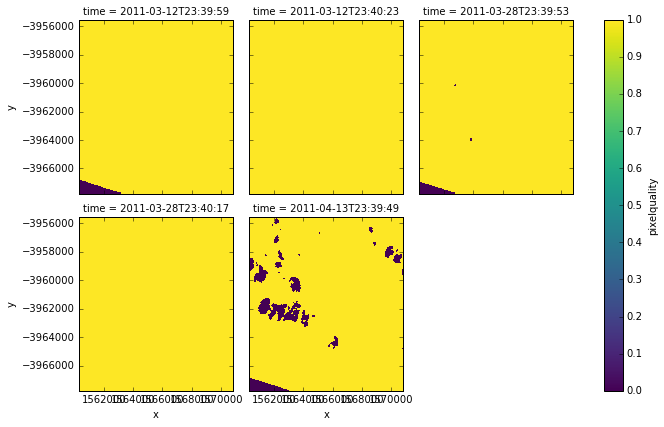

In [23]:
good_data = masking.make_mask(pq, cloud_acca='no_cloud', cloud_fmask='no_cloud', contiguous=True)
autumn_good_data = good_data.pixelquality.loc['2011-3':'2011-5']
autumn_good_data.plot(col='time', col_wrap=3)

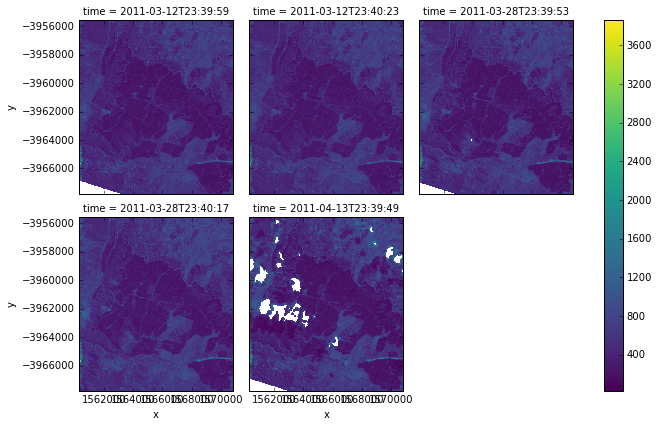

In [24]:
autumn_cloud_free = autumn_valid.where(autumn_good_data)
autumn_cloud_free.plot(col='time', col_wrap=3)

We have fewer times than we did previously.

In [17]:
autumn2 = nbar_by_solar_day.green.loc['1991-3':'1991-5']
autumn2.shape

(5, 490, 421)

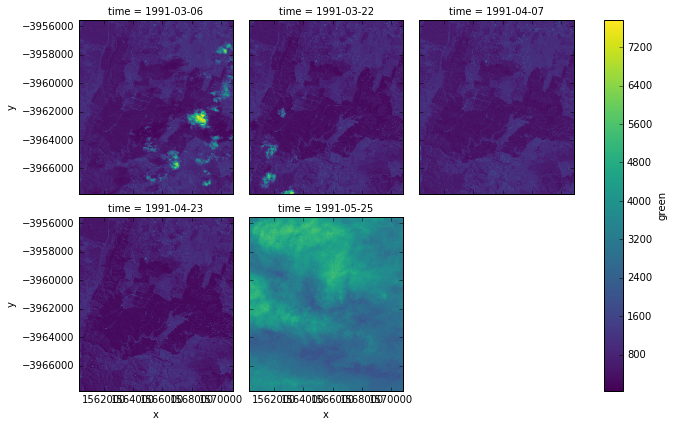

In [18]:
autumn2.plot(col='time', col_wrap=3)

## Some basic band maths
We can combine the `red` and `nir` (_near-infrared_) bands to calculate NDVI (_normalised difference vegetation index_).

In [19]:
two_bands = dc.load(product='ls5_nbar_albers', x=(149.07, 149.17), y=(-35.25, -35.35), 
                    time=('1991', '1992'), measurements=['red', 'nir'], group_by='solar_day')
red = two_bands.red.where(two_bands.red != two_bands.red.attrs['nodata'])
nir = two_bands.nir.where(two_bands.nir != two_bands.nir.attrs['nodata'])
pq = dc.load(product='ls5_pq_albers', x=(149.07, 149.17), y=(-35.25, -35.35), 
             time=('1991', '1992'), group_by='solar_day')
cloud_free = masking.make_mask(pq, cloud_acca='no_cloud', cloud_fmask='no_cloud', contiguous=True).pixelquality

ndvi = ((nir - red) / (nir + red)).where(cloud_free)

In [20]:
ndvi.shape

(18, 490, 420)

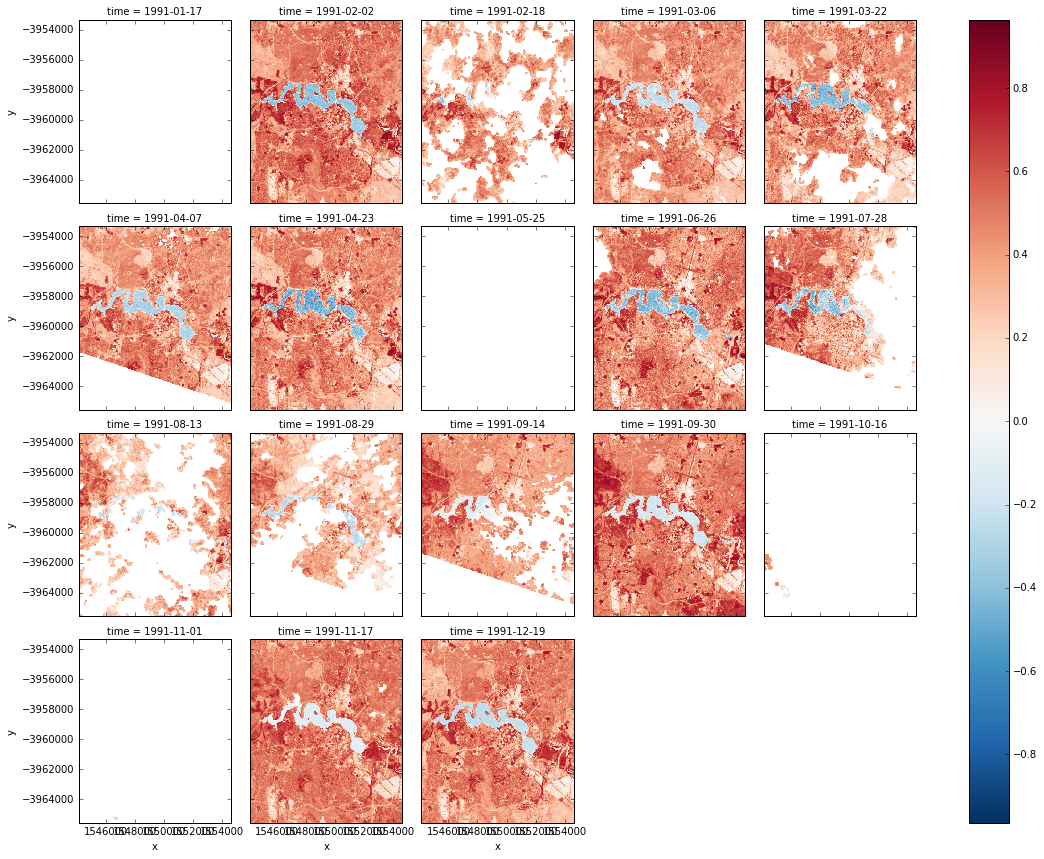

In [21]:
ndvi.plot(col='time', col_wrap=5)

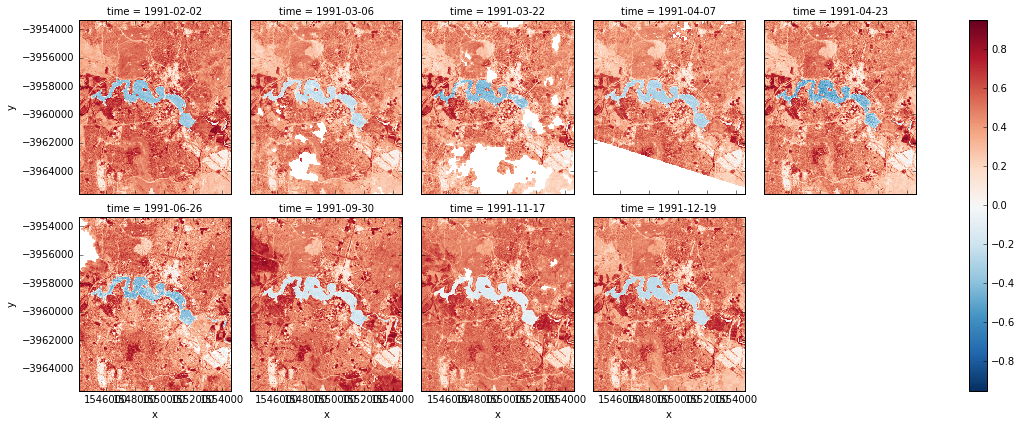

In [22]:
mostly_cloud_free = cloud_free.sum(dim=('x','y')) > (0.75 * cloud_free.size / cloud_free.time.size)
mostly_good_ndvi = ndvi.where(mostly_cloud_free).dropna('time', how='all')
mostly_good_ndvi.plot(col='time', col_wrap=5)

## Some stats

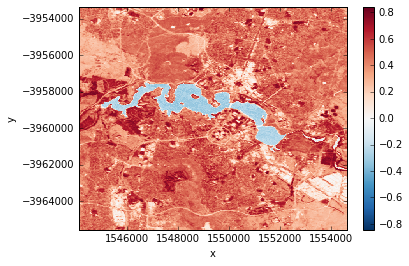

In [23]:
mostly_good_ndvi.median(dim='time').plot()

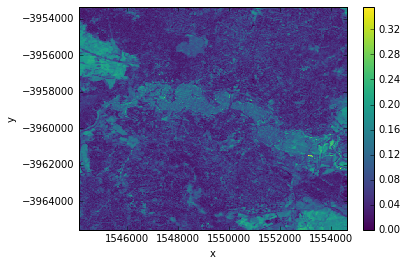

In [24]:
mostly_good_ndvi.std(dim='time').plot()

## Pixel drill

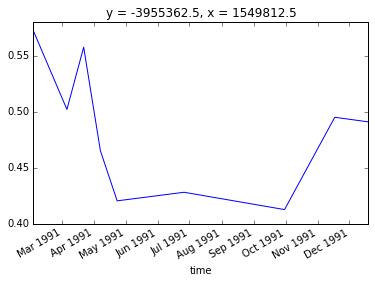

In [25]:
mostly_good_ndvi.sel(y=-3955361, x=1549813, method='nearest').plot()

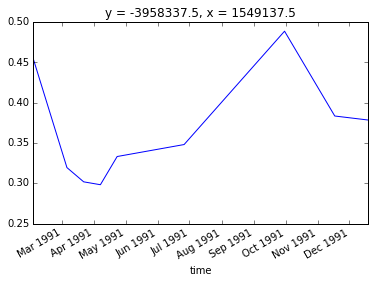

In [26]:
mostly_good_ndvi.isel(x=[200], y=[200]).plot()

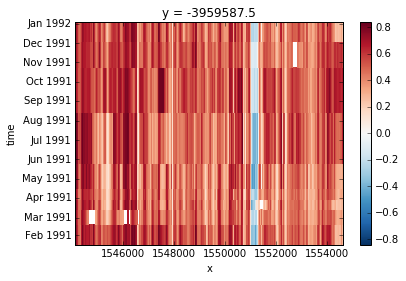

In [27]:
mostly_good_ndvi.isel(y=250).plot()

A line shapefile with pairs of coordinates (using `sel_points` instead of `isel_points`) would be able to be interpolated into something less blocky for the next plot.

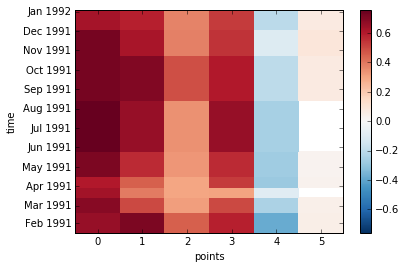

In [28]:
mostly_good_ndvi.isel_points(x=[0, 100, 200, 300, 300, 400], 
                             y=[200, 200, 200, 250, 300, 400]).plot(x='points', y='time')

## Plotting a multi-band image

In [29]:
rgb = dc.load(product='ls5_nbar_albers', 
              x=(149.07, 149.17), y=(-35.25, -35.35), 
              time=('1991-3-1', '1991-6-30'), 
              measurements=['red', 'green', 'blue'], 
              group_by='solar_day', stack='color').transpose('time', 'y', 'x', 'color')
zip(rgb.dims, rgb.shape)

[('time', 6), ('y', 490), ('x', 420), ('color', 3)]

In [30]:
fake_saturation = 3000
clipped_visible = rgb.where(rgb<fake_saturation).fillna(fake_saturation)
max_val = clipped_visible.max(['y', 'x'])
scaled = (clipped_visible / max_val)

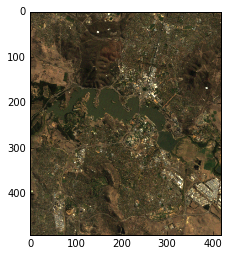

In [31]:
from matplotlib import pyplot as plt
plt.imshow(scaled.isel(time=3))

## Elevation

In [15]:
grid = dc.load(product='dsm1sv10', x=(149.07, 149.17), y=(-35.25, -35.35))
grid.elevation.shape

AttributeError: 'NoneType' object has no attribute 'metadata_type'

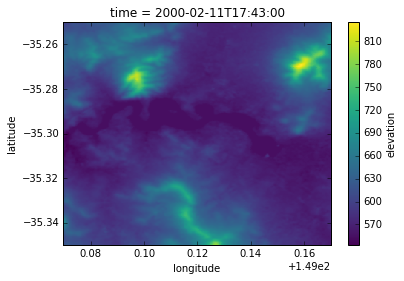

In [33]:
grid.elevation[0].plot()

## Reprojection

In [34]:
albers_grid = dc.load(product='dsm1sv10', x=(149.07, 149.17), y=(-35.25, -35.35), 
                      output_crs='EPSG:3577', resolution=(-25,25))
albers_grid.elevation.shape

(1, 490, 420)

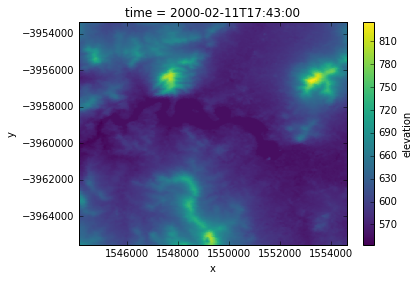

In [35]:
albers_grid.elevation[0].plot()